In [20]:
import numpy as np


def numerical_diff(f, x, h):
    return (f(x+h) - f(x)) / h

def numerical_diff_center(f, x, h):
    return (f(x+h) - f(x-h)) / (2*h)

def numerical_diff_center_2(f, x, h):
    return (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h)) / (12*h)

def f(x):
    return 0.1 * np.sin(x)

In [3]:
import numpy as np

In [5]:
f = np.sin

In [7]:
def numerical_diff_center_2(f, x, h):
    print(x - 2*h, x - h, x + h, x + 2*h)
    return (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h)) / (12*h)

numerical_diff_center_2(f, np.pi/3, 0.001)

1.0451975511965976 1.0461975511965977 1.0481975511965975 1.0491975511965976


0.4999999999998524

/var/folders/k0/0f8kvxl562db4z1s1j8l0v4c0000gn/T/ipykernel_21891/978016069.py:3: RuntimeWarning: invalid value encountered in power
  y = x ** (-1/3)


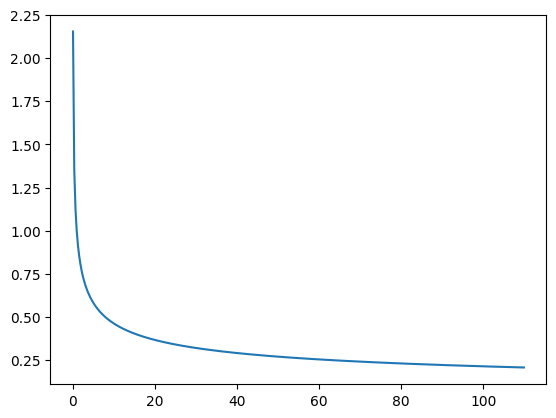

In [43]:
# plot (-1/3)
x = np.arange(-110, 110, 0.3)
y = x ** (-1/3)
plt.plot(x, y)

In [21]:
print(numerical_diff(f, np.pi/3, 1e-1))
print(numerical_diff(f, np.pi/3, 1e-2))
print(numerical_diff(f, np.pi/3, 1e-3))

0.04559018854107616
0.04956615757736871
0.04995669040007422


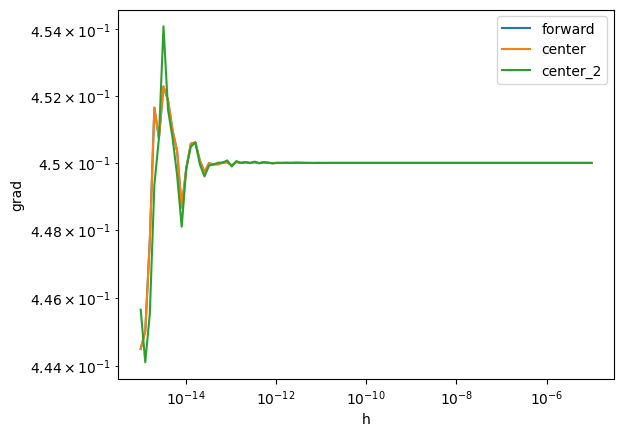

In [29]:
import matplotlib.pyplot as plt

h = np.logspace(-5, -15, num=100)
grad_forward = numerical_diff(f, np.pi/3, h)
grad_center = numerical_diff_center(f, np.pi/3, h)
grad_center_2 = numerical_diff_center_2(f, np.pi/3, h)
grad_true = np.cos(np.pi/3)

error_forward = np.abs(grad_forward - grad_true)
error_center = np.abs(grad_center - grad_true)
error_center_2 = np.abs(grad_center_2 - grad_true)

plt.plot(h, error_forward, label='forward')
plt.plot(h, error_center, label='center')
plt.plot(h, error_center_2, label='center_2')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('grad')
plt.legend()
plt.show()

In [174]:
def numerical_nabla(f, x, h):
    n = len(x)
    nabla = np.zeros(n)
    for i in range(n):
        x_i = x[i]
        x[i] = x_i + h
        f_plus = f(*x)
        x[i] = x_i - h
        f_minus = f(*x)
        nabla[i] = (f_plus - f_minus) / (2*h)
        x[i] = x_i
    return nabla

In [175]:
def numerical_nabla(f, x, h):
    n = len(x)
    nabla = np.zeros(n)
    for i in range(n):
        x_i = x[i]
        x[i] = x_i + h
        f_plus = f(*x)
        x[i] = x_i - h
        f_minus = f(*x)
        nabla[i] = (f_plus - f_minus) / (2*h)
        x[i] = x_i
    return nabla


def f(x, y):
    return x**2 + y**2

x, y = 1., 2.

numerical_nabla(f, np.array([x, y]), 1e-3)

array([2., 4.])

In [176]:
import numpy as np

def numerical_jacobian(f, x, h=1e-5):
    n = len(x)
    m = len(f(*x))
    jacobian = np.zeros((m, n))
    
    for i in range(n):
        x_i = x[i]
        x[i] = x_i + h
        f_plus = f(*x)
        x[i] = x_i - h
        f_minus = f(*x)
        jacobian[:, i] = (f_plus - f_minus) / (2 * h)
        x[i] = x_i
    
    return jacobian

def f(x, y):
    return np.array([x**2 + y**2, x*y])

x, y = 1.0, 2.0

numerical_jacobian(f, np.array([x, y]))

array([[2., 4.],
       [2., 1.]])

数式微分

In [426]:
import pydot
import numpy as np


class Expression:
    def __init__(self, root):
        self.root = root
    
    def __call__(self, x):
        return self.root(x)
    
    def __repr__(self):
        return str(self.root)
    
    def plot(self):
        G = pydot.Dot(graph_type='digraph')
        self.root._plot(G)
        return G
    
    def diff(self):
        new_expr = Expression(self.root.diff())
        return new_expr
    
    def simplify(self):
        new_expr = Expression(self.root.simplify())
        return new_expr
        
class AbstractNode:
    def __init__(self):
        self.children = []

    def __call__(self, x):
        raise NotImplementedError

    def __repr__(self):
        raise NotImplementedError

    def _plot(self, G):
        node = pydot.Node(id(self), label=self._label())
        G.add_node(node)
        for child in self.children:
            G.add_edge(pydot.Edge(node, pydot.Node(id(child), label=child._label())))
            child._plot(G)

    def diff(self):
        raise NotImplementedError


class Variable(AbstractNode):
    def __init__(self):
        super().__init__()
    
    def __call__(self, x):
        return x
    
    def _label(self):
        return 'x'
    
    def __repr__(self):
        return 'x'
    
    def diff(self):
        return Constant(1)
    
    def simplify(self):
        return self
    
    
class Constant(AbstractNode):
    def __init__(self, value):
        super().__init__()
        self.value = value

    def __call__(self, x):
        return self.value
    
    def _label(self):
        return str(self.value)
    
    def __repr__(self):
        return str(self.value)
    
    def diff(self):
        return Constant(0)
    
    def simplify(self):
        return self
    
class Add(AbstractNode):
    def __init__(self, x, y):
        super().__init__()
        self.children = [x, y]

    def __repr__(self):
        return '(' + str(self.children[0]) + ' + ' + str(self.children[1]) + ')'
    
    def _label(self):
        return '+'
    
    def __call__(self, x):
        return self.children[0](x) + self.children[1](x)
    
    def diff(self):
        return Add(self.children[0].diff(), self.children[1].diff())
    
    def simplify(self):
        if isinstance(self.children[0].simplify(), Constant) and self.children[0].simplify().value == 0:
            return self.children[1].simplify()
        elif isinstance(self.children[1].simplify(), Constant) and self.children[1].simplify().value == 0:
            return self.children[0].simplify()
        else:
            return Add(self.children[0].simplify(), self.children[1].simplify())
    
class Mul(AbstractNode):
    def __init__(self, x, y):
        super().__init__()
        self.children = [x, y]

    def __repr__(self):
        return '(' + str(self.children[0]) + ' * ' + str(self.children[1]) + ')'
    
    def _label(self):
        return '*'
    
    def __call__(self, x):
        return self.children[0](x) * self.children[1](x)
    
    def diff(self):
        return Add(Mul(self.children[0].diff(), self.children[1]), Mul(self.children[0], self.children[1].diff()))
    
    def simplify(self):
        if isinstance(self.children[0].simplify(), Constant) and self.children[0].simplify().value == 0:
            return Constant(0)
        elif isinstance(self.children[1].simplify(), Constant) and self.children[1].simplify().value == 0:
            return Constant(0)
        elif isinstance(self.children[0].simplify(), Constant) and self.children[0].simplify().value == 1:
            return self.children[1].simplify()
        elif isinstance(self.children[1].simplify(), Constant) and self.children[1].simplify().value == 1:
            return self.children[0].simplify()
        else:
            return Mul(self.children[0].simplify(), self.children[1].simplify())
    
class Sin(AbstractNode):
    def __init__(self, x):
        super().__init__()
        self.children = [x]

    def __repr__(self):
        return 'sin(' + str(self.children[0]) + ')'
    
    def _label(self):
        return 'sin'
    
    def __call__(self, x):
        return np.sin(self.children[0](x))
    
    def diff(self):
        return Mul(Cos(self.children[0]), self.children[0].diff())
    
    def simplify(self):
        return Sin(self.children[0].simplify())
    
    
class Cos(AbstractNode):
    def __init__(self, x):
        super().__init__()
        self.children = [x]

    def __repr__(self):
        return 'cos(' + str(self.children[0]) + ')'
    
    def _label(self):
        return 'cos'
    
    def __call__(self, x):
        return np.cos(self.children[0](x))
    
    def diff(self):
        return Mul(Constant(-1), Mul(Sin(self.children[0]), self.children[0].diff()))
    
    def simplify(self):
        return Cos(self.children[0].simplify())

In [427]:
f = Expression(Mul(Add(Variable(), Constant(1)), Sin(Variable())))

In [428]:
print(f)

((x + 1) * sin(x))


In [429]:
# savefig
f.plot().write_png('fig/expr.png')

In [430]:
df = f.diff()

In [431]:
df

(((1 + 0) * sin(x)) + ((x + 1) * (cos(x) * 1)))

In [432]:
x = np.random.random()
print(df(x))
print(numerical_diff(f, x
, 1e-5))


1.9633321224958697
1.9633308231847832


In [433]:
df.plot().write_png('fig/expr_diff.png')


In [434]:
df

(((1 + 0) * sin(x)) + ((x + 1) * (cos(x) * 1)))

In [435]:
df.simplify()

(sin(x) + ((x + 1) * cos(x)))

In [436]:
df.simplify().plot().write_png('fig/expr_diff_simple.png')

In [466]:
# 掛け算が入れ子になったもの
g = Expression(
    Mul(
        Mul(
            Mul(
                Variable(),
                Add(
                    Variable(),
                    Constant(3)
                )
            ),
            Sin(
                Variable()
            )
        ),
        Mul(
            Variable(),
            Add(
                Variable(),
                Constant(4)
            )
        )
    )
)

In [467]:
g

(((x * (x + 3)) * sin(x)) * (x * (x + 4)))

In [468]:
g.diff()

((((((1 * (x + 3)) + (x * (1 + 0))) * sin(x)) + ((x * (x + 3)) * (cos(x) * 1))) * (x * (x + 4))) + (((x * (x + 3)) * sin(x)) * ((1 * (x + 4)) + (x * (1 + 0)))))

In [469]:
g.diff().simplify()

((((((x + 3) + x) * sin(x)) + ((x * (x + 3)) * cos(x))) * (x * (x + 4))) + (((x * (x + 3)) * sin(x)) * ((x + 4) + x)))

In [ ]:
import pydot
import numpy as np


class Expression:
    def __init__(self, root):
        self.root = root
    
    def __call__(self, args):
        return self.root(args)
    
    def __repr__(self):
        return str(self.root)
    
    def plot(self):
        G = pydot.Dot(graph_type='digraph')
        self.root._plot(G)
        return G
    
    def diff(self):
        new_expr = Expression(self.root.diff())
        return new_expr
    
    def simplify(self):
        new_expr = Expression(self.root.simplify())
        return new_expr
        
class AbstractNode:
    def __init__(self):
        self.children = []

    def __call__(self, x):
        raise NotImplementedError

    def __repr__(self):
        raise NotImplementedError

    def _plot(self, G):
        node = pydot.Node(id(self), label=self._label())
        G.add_node(node)
        for child in self.children:
            G.add_edge(pydot.Edge(node, pydot.Node(id(child), label=child._label())))
            child._plot(G)

    def diff(self):
        raise NotImplementedError


class Variable(AbstractNode):
    def __init__(self, name):
        super().__init__()
        self.name = name
    
    def __call__(self, args):
        return args[self.name]
    
    def _label(self):
        return self.name
    
    def __repr__(self):
        return self.name
    
    def diff(self, d_var):
        if self.name == d_var:
            return Constant(1)
        else:
            return Constant(0)

    def simplify(self):
        return self
    
    
class Constant(AbstractNode):
    def __init__(self, value):
        super().__init__()
        self.value = value

    def __call__(self, x):
        return self.value
    
    def _label(self):
        return str(self.value)
    
    def __repr__(self):
        return str(self.value)
    
    def diff(self):
        return Constant(0)
    
    def simplify(self):
        return self
    
class Add(AbstractNode):
    def __init__(self, x, y):
        super().__init__()
        self.children = [x, y]

    def __repr__(self):
        return '(' + str(self.children[0]) + ' + ' + str(self.children[1]) + ')'
    
    def _label(self):
        return '+'
    
    def __call__(self, args):
        return self.children[0](args) + self.children[1](args)
    
    def diff(self):
        return Add(self.children[0].diff(), self.children[1].diff())
    
    def simplify(self):
        if isinstance(self.children[0].simplify(), Constant) and self.children[0].simplify().value == 0:
            return self.children[1].simplify()
        elif isinstance(self.children[1].simplify(), Constant) and self.children[1].simplify().value == 0:
            return self.children[0].simplify()
        else:
            return Add(self.children[0].simplify(), self.children[1].simplify())
    
class Mul(AbstractNode):
    def __init__(self, x, y):
        super().__init__()
        self.children = [x, y]

    def __repr__(self):
        return '(' + str(self.children[0]) + ' * ' + str(self.children[1]) + ')'
    
    def _label(self):
        return '*'
    
    def __call__(self, args):
        return self.children[0](args) * self.children[1](args)
    
    def diff(self):
        return Add(Mul(self.children[0].diff(), self.children[1]), Mul(self.children[0], self.children[1].diff()))
    
    def simplify(self):
        if isinstance(self.children[0].simplify(), Constant) and self.children[0].simplify().value == 0:
            return Constant(0)
        elif isinstance(self.children[1].simplify(), Constant) and self.children[1].simplify().value == 0:
            return Constant(0)
        elif isinstance(self.children[0].simplify(), Constant) and self.children[0].simplify().value == 1:
            return self.children[1].simplify()
        elif isinstance(self.children[1].simplify(), Constant) and self.children[1].simplify().value == 1:
            return self.children[0].simplify()
        else:
            return Mul(self.children[0].simplify(), self.children[1].simplify())
    
class Sin(AbstractNode):
    def __init__(self, x):
        super().__init__()
        self.children = [x]

    def __repr__(self):
        return 'sin(' + str(self.children[0]) + ')'
    
    def _label(self):
        return 'sin'
    
    def __call__(self, x):
        return np.sin(self.children[0](x))
    
    def diff(self):
        return Mul(Cos(self.children[0]), self.children[0].diff())
    
    def simplify(self):
        return Sin(self.children[0].simplify())
    
    
class Cos(AbstractNode):
    def __init__(self, x):
        super().__init__()
        self.children = [x]

    def __repr__(self):
        return 'cos(' + str(self.children[0]) + ')'
    
    def _label(self):
        return 'cos'
    
    def __call__(self, x):
        return np.cos(self.children[0](x))
    
    def diff(self):
        return Mul(Constant(-1), Mul(Sin(self.children[0]), self.children[0].diff()))
    
    def simplify(self):
        return Cos(self.children[0].simplify())